<a href="https://colab.research.google.com/github/ryuta34/real_estate_trade/blob/main/real_estate_trade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

{'status': 'OK', 'data': [{'Type': '中古マンション等', 'MunicipalityCode': '13102', 'Prefecture': '東京都', 'Municipality': '中央区', 'DistrictName': '明石町', 'TradePrice': '53000000', 'FloorPlan': '２ＤＫ', 'Area': '50', 'BuildingYear': '平成24年', 'Structure': 'ＲＣ', 'Use': '住宅', 'CityPlanning': '第２種住居地域', 'CoverageRatio': '60', 'FloorAreaRatio': '400', 'Period': '2020年第１四半期', 'Renovation': '未改装'}, {'Type': '中古マンション等', 'MunicipalityCode': '13102', 'Prefecture': '東京都', 'Municipality': '中央区', 'DistrictName': '明石町', 'TradePrice': '87000000', 'FloorPlan': '３ＬＤＫ', 'Area': '75', 'BuildingYear': '平成26年', 'Structure': 'ＲＣ', 'Use': '住宅', 'Purpose': '住宅', 'CityPlanning': '第２種住居地域', 'CoverageRatio': '60', 'FloorAreaRatio': '400', 'Period': '2019年第４四半期', 'Renovation': '改装済'}, {'Type': '中古マンション等', 'MunicipalityCode': '13102', 'Prefecture': '東京都', 'Municipality': '中央区', 'DistrictName': '明石町', 'TradePrice': '16000000', 'FloorPlan': '１Ｋ', 'Area': '20', 'BuildingYear': '昭和53年', 'Structure': 'ＳＲＣ', 'CityPlanning': '第２種住居地域'

,Type,MunicipalityCode,Prefecture,Municipality,DistrictName,TradePrice,FloorPlan,Area,BuildingYear,Structure,Use,CityPlanning,CoverageRatio,FloorAreaRatio,Period,Renovation,Purpose,Region,LandShape,Frontage,TotalFloorArea,Direction,Classification,Breadth,Remarks,PricePerUnit,UnitPrice
0,中古マンション等,13102,東京都,中央区,明石町,53000000,２ＤＫ,50,平成24年,ＲＣ,住宅,第２種住居地域,60,400,2020年第１四半期,未改装,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,中古マンション等,13102,東京都,中央区,明石町,87000000,３ＬＤＫ,75,平成26年,ＲＣ,住宅,第２種住居地域,60,400,2019年第４四半期,改装済,住宅,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,中古マンション等,13102,東京都,中央区,明石町,16000000,１Ｋ,20,昭和53年,ＳＲＣ,NaN,第２種住居地域,60,400,2019年第３四半期,改装済,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,中古マンション等,13102,東京都,中央区,明石町,20000000,１Ｋ,25,昭和60年,ＳＲＣ,NaN,第２種住居地域,60,400,2019年第３四半期,改装済,住宅,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,中古マンション等,13102,東京都,中央区,明石町,55000000,１ＬＤＫ,50,平成24年,ＲＣ,住宅,第２種住居地域,60,400,2019年第３四半期,未改装,住宅,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,中古マンション等,13102,東京都,中央区,湊,39000000,２ＬＤＫ,40,NaN,NaN,住宅,商業地域,80,500,2015年第１四半期,未改装,住宅,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4496,宅地(土地と建物),13102,東京都,中央区,八重洲,630000000,NaN,105,昭和52年,ＲＣ,事務所,商業地域,80,800,2015年第２四半期,NaN,NaN,商業地,台形,8.5,470,南西,区道,8.0,NaN,NaN,NaN
4497,宅地(土地と建物),13102,東京都,中央区,八重洲,150000000,NaN,45,昭和62年,鉄骨造,事務所,商業地域,80,700,2016年第３四半期,NaN,事務所,商業地,長方形,6.4,195,南東,区道,11.0,関係者間取引,NaN,NaN
4498,宅地(土地と建物),13102,東京都,中央区,八重洲,420000000,NaN,50,昭和54年,鉄骨造,事務所、倉庫、店舗,商業地域,80,800,2015年第４四半期,NaN,店舗,商業地,長方形,4.0,190,南東,区道,11.0,NaN,NaN,NaN


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 13217 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20197 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 19978 missing from current font.
  font.set_text

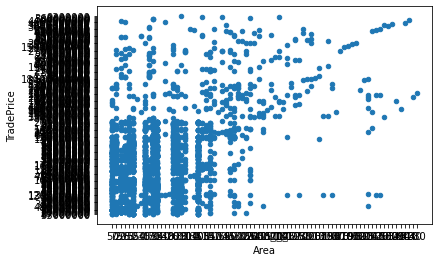

In [ ]:
import requests
import json
import pandas as pd

# データをweb APIから取得するクラス
class GetData():
  def __init__(self, requestUrl):
    self.requestUrl = requestUrl;

  def sendRequest(self):
    request = requests.get(self.requestUrl)
    response = request.text
    return response

# 取得したjsonをdict型に変換するクラス
class JsonToList():
  def __init__(self, jsonData):
    self.jsonData = jsonData;

  def jsonToList(self):
    listData = json.loads(self.jsonData)
    return listData

if __name__ == '__main__':
  # URLのパラメータ設定
  prm_from = '20151'
  prm_to = '20204'
  prm_area = '13'
  prm_city = '13102'

  # URLパターン (都道府県別、市町村別)
  PrefUrl = f'https://www.land.mlit.go.jp/webland/api/TradeListSearch?from={prm_from}&to={prm_to}&area={prm_area}'
  CityUrl = f'https://www.land.mlit.go.jp/webland/api/TradeListSearch?from={prm_from}&to={prm_to}&city={prm_city}'

  # 取得するデータ(URL)を設定 - 都道府県全体 -> PrefUrl, 市町村単位 -> CityUrl)
  # インスタンス化
  getData = GetData(CityUrl)
  # getDataのjson objectを変数に格納
  jsonData = getData.sendRequest()

  # JsonToListクラスのインスタンス化
  jsonToListData = JsonToList(jsonData)
  # jsonをdict型にして表示
  dictData = jsonToListData.jsonToList()
  print(dictData)


  # データを表示
  df = pd.DataFrame(dictData['data'])  # pandasでデータフレーム化
  display(df) # データテーブルを表示
  df.plot(kind='scatter', x='Area', y='TradePrice') # x軸：Area y軸：TradePrice で散布図を表示
